## Exploring Relationships

__1.Set up a Jupyter notebook with visualization libraries, and import the cleaned data set.__

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [2]:
#checking for the matplotlip version
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#importing dataset
df = pd.read_csv(r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis/02 Data/Prepared Data/Munich_cleaned.csv')

In [5]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0
1,1,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0
2,2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8
3,3,159634,"Fancy, bright central roof top flat and homeof...",765694,Sanna,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0
4,4,170154,"Own floor & bath, parking & breakfast",108297,Alex,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18


In [6]:
#checking the shape of our dataset
df.shape

(4995, 15)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [8]:
#dropping unecessary collumn for our correlation
df_1 = df.drop(columns = ['Unnamed: 0','latitude','longitude' ,'id', 'name', 'host_id', 'host_name', 'room_type'])

In [9]:
df_1.head()

,neighbourhood,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Hadern,80.0,2,129,2,22,0
1,Berg am Laim,95.0,2,53,2,52,0
2,Maxvorstadt,99.0,3,101,1,4,8
3,Pasing-Obermenzing,52.0,3,34,1,0,0
4,Sendling-Westpark,55.0,2,496,1,162,18


__2.Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.__

In [10]:
df_1.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.030615,-0.033994,0.001471,0.063272,-0.013093
minimum_nights,-0.030615,1.000000,-0.052315,0.032972,0.087223,-0.053141
number_of_reviews,-0.033994,-0.052315,1.000000,0.016540,0.070404,0.560434
calculated_host_listings_count,0.001471,0.032972,0.016540,1.000000,0.118401,0.065058
availability_365,0.063272,0.087223,0.070404,0.118401,1.000000,0.084387
number_of_reviews_ltm,-0.013093,-0.053141,0.560434,0.065058,0.084387,1.000000


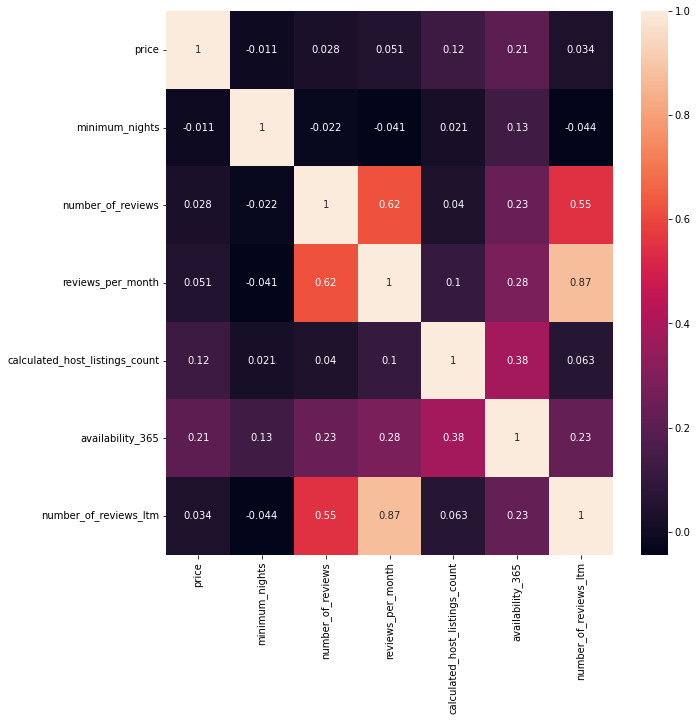

In [13]:
#Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_1.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The strong positive relationship between number_of_reviews and reviews_per_month simply because reviews_per_month is a calculated variable based on number_of_reviews.The others have quite a weak relationship

I find it interesting:

the positive relationship of availability_365 with calculated_host_listings_count and minimum_nights seem to be quite interesting but somehow reasonable.


__3.Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.__

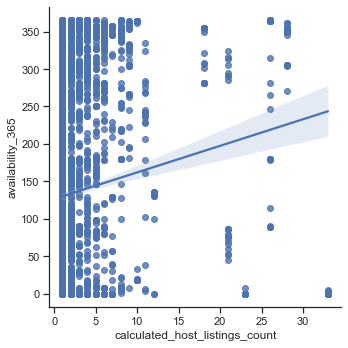

In [27]:
# Create scatterplot for variables "availability_365" and "calculated_host_listings_count"
sns.lmplot(x = 'calculated_host_listings_count', y = 'availability_365', data = df_1)

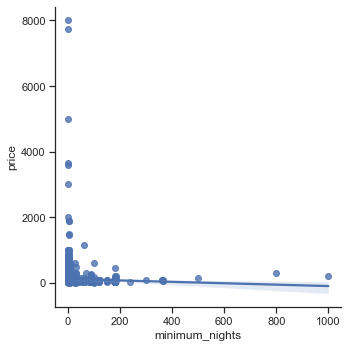

In [37]:
# Create scatterplot for variables "availability_365" and "calculated_host_listings_count"
sns.lmplot(x = 'minimum_nights', y = 'price', data = df_1)

There is a relationship between both however the linear seem weak.

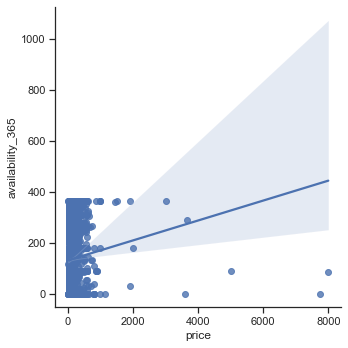

In [26]:
# Create scatterplot for variables "availability_365" and "calculated_host_listings_count"
sns.lmplot(x = 'price', y = 'availability_365', data = df_1)

In [ ]:
there seem to be a weak linear relationship

__4. Pairplot__

In [13]:
# Create new subset for pair plot with only relevant variables
df_2 = df_1[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

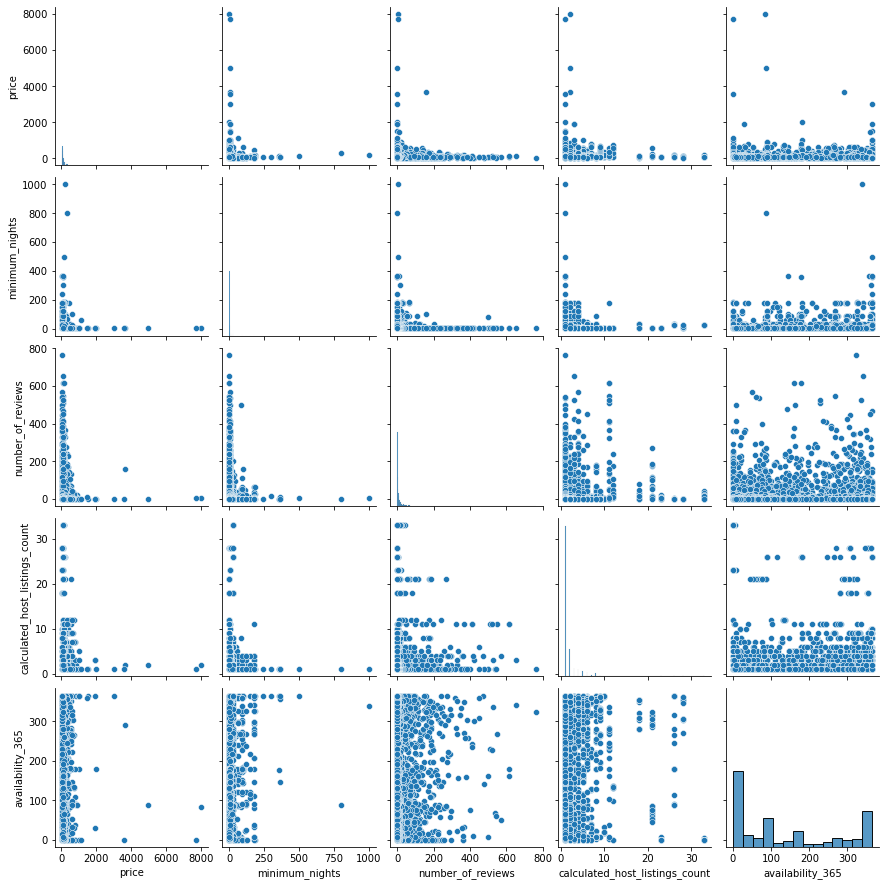

In [14]:
# Create pair plot
p = sns.pairplot(df_2)

the price of rooms is significantly higher than the rest when it is available for over 90 days. It needs to be checked whether there is a legal limit for private host the duration in renting their apartment

likewise, the price of rooms available 365 days / year seem to be higher.


/Users/rayruslijunior/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

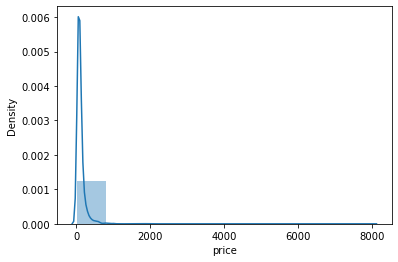

In [19]:
# Create histogram of price
sns.distplot(df_2['price'], bins = 10)

__4. Deriving new columns__

In [11]:
# Define categories for price segment
df.loc[df['price'] < 80, 'price_category'] = 'Low price'
df.loc[(df['price'] >= 80) & (df['price'] < 200), 'price_category'] = 'Middle price'
df.loc[df['price'] >= 200, 'price_category'] = 'High price'

In [12]:
df.head(100)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category
0,0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price
1,1,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price
2,2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price
3,3,159634,"Fancy, bright central roof top flat and homeof...",765694,Sanna,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price
4,4,170154,"Own floor & bath, parking & breakfast",108297,Alex,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,321542,Absolute quiet room,1646639,Walter,Thalkirchen-Obersendling-Forstenried-Fürstenri...,48.09307,11.52147,Private room,42.0,16,26,1,359,0,Low price
96,96,392399,"Sunny room, private bathroom and roof top terrace",1962150,Christa,Sendling,48.11397,11.54844,Private room,68.0,2,92,1,0,0,Low price
97,97,406404,Holiday Flat in Munich Schwabing,2024648,Tammy,Schwabing-West,48.17723,11.58283,Entire home/apt,120.0,30,1,4,357,0,Middle price
98,98,483093,cozy-apartment - *WLAN* PARKING,2391129,Julia Und Lisa,Ramersdorf-Perlach,48.09748,11.63993,Entire home/apt,350.0,2,169,3,265,7,High price


In [13]:
# Count price category
df['price_category'].value_counts(dropna = False)

Low price       2348
Middle price    2103
High price       544
Name: price_category, dtype: int64

In [14]:
# Define categories for rental term
df.loc[df['availability_365'] <= 90, 'rental_term'] = 'Short term'
df.loc[(df['availability_365'] > 90) & (df['availability_365'] <= 180) , 'rental_term'] = 'Medium term'
df.loc[df['availability_365'] > 180, 'rental_term'] = 'Long term'

In [15]:
df['rental_term'].value_counts(dropna = False)

Short term     2794
Long term      1559
Medium term     642
Name: rental_term, dtype: int64

In [16]:
# Create new category for host type for later analysis
df.loc[df['calculated_host_listings_count'] <= 1, 'host_type'] = 'Private host'
df.loc[df['calculated_host_listings_count'] > 1, 'host_type'] = 'Commercial host'

In [17]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,rental_term,host_type
0,0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price,Short term,Commercial host
1,1,114695,Apartment Munich/East with sundeck,581737,Stephan,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price,Short term,Commercial host
2,2,127383,City apartment next to Pinakothek,630556,Sonja,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price,Short term,Private host
3,3,159634,"Fancy, bright central roof top flat and homeof...",765694,Sanna,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price,Short term,Private host
4,4,170154,"Own floor & bath, parking & breakfast",108297,Alex,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price,Medium term,Private host


__5. Categorical Plot__

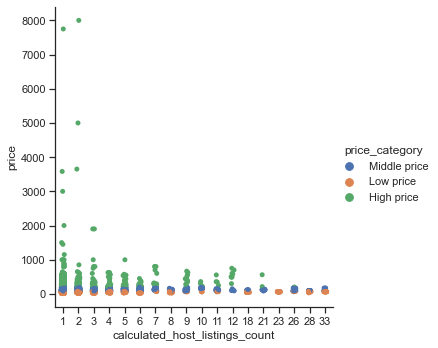

In [18]:
# Create catplot with categories
sns.set(style="ticks")
p = sns.catplot(x="calculated_host_listings_count", y="price", hue="price_category", data=df)

xxx

__6. Early Visual EDA__

In [19]:
# Check neighbourhood_group x price category
crosstab_1 = pd.crosstab(df['neighbourhood'], df['price_category'], dropna = False)

In [20]:
crosstab_1

price_category,High price,Low price,Middle price
neighbourhood,,,
Allach-Untermenzing,2,26,17
Altstadt-Lehel,39,42,96
Au-Haidhausen,32,147,147
Aubing-Lochhausen-Langwied,3,41,15
Berg am Laim,11,55,31
Bogenhausen,21,102,108
Feldmoching-Hasenbergl,6,39,20
Hadern,4,27,20
Laim,12,89,49


NameError: name 'cross_category' is not defined

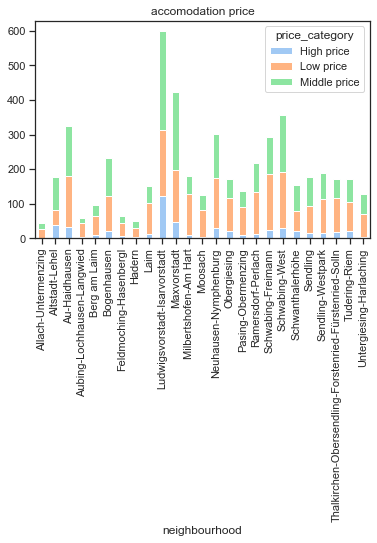

In [21]:
cross_category.plot = crosstab_1.plot.bar(stacked = True, color = sns.color_palette('pastel')),plt.title('accomodation price')


Munich has several high price accomodation, most district that has it is Ludwigstadt and Maxvorstadt.

In [22]:
# Check counts of room types
df['room_type'].value_counts(dropna=False)

Entire home/apt    3014
Private room       1858
Shared room          67
Hotel room           56
Name: room_type, dtype: int64

In [23]:
# Check number of rooms in each neighbourhood_group by room type
crosstab = pd.crosstab(df['neighbourhood'], df['room_type'], dropna = False)

In [24]:
crosstab

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Allach-Untermenzing,14,0,26,5
Altstadt-Lehel,123,2,52,0
Au-Haidhausen,212,11,99,4
Aubing-Lochhausen-Langwied,26,0,33,0
Berg am Laim,48,0,46,3
Bogenhausen,152,0,77,2
Feldmoching-Hasenbergl,35,0,28,2
Hadern,24,0,26,1
Laim,75,0,73,2


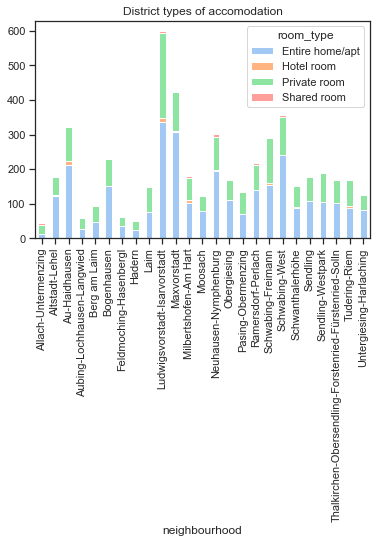

In [25]:
cross_district = crosstab.plot.bar(stacked = True, color = sns.color_palette('pastel')),plt.title('District types of accomodation')

Ludwigsvorstadt and Maxvorstadt has the highest number of entire home/apt for rent.

In [26]:
#crosstab rental_term and price category
crosstab_2=pd.crosstab(df['rental_term'], df['price_category'], dropna = False)

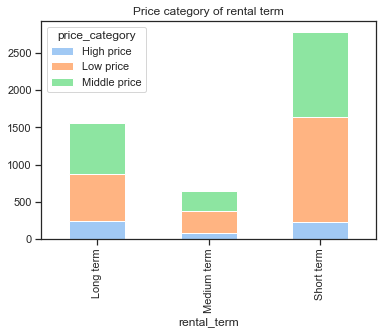

In [27]:
cross_term = crosstab_2.plot.bar(stacked = True, color = sns.color_palette('pastel')),plt.title('Price category of rental term')

In [42]:
# Check mean price per neighourhood
df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price', ascending=False)

,price
neighbourhood,
Ludwigsvorstadt-Isarvorstadt,182.885807
Altstadt-Lehel,147.016949
Schwanthalerhöhe,140.057137
Bogenhausen,125.415818
Obergiesing,122.284884
Maxvorstadt,120.719001
Tudering-Riem,119.309942
Au-Haidhausen,118.877301
Sendling-Westpark,116.925926


In [28]:
# Check mean price per accomodation type
df.groupby('room_type').agg({'price': 'mean'}).sort_values('price', ascending=False)

,price
room_type,
Hotel room,162.400447
Entire home/apt,133.321518
Private room,93.930481
Shared room,90.835821


In [32]:
df.groupby('host_type').agg({'price': 'mean'}).sort_values('price', ascending=False)

,price
host_type,
Commercial host,131.220716
Private host,112.554489


In [33]:
#creating path for export
path = r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis'

In [34]:
# Export wrangled data set with derived columns
df.to_csv(os.path.join(path, '02 Data','Prepared Data','munich_clean1.csv'))